# Quick data analysis using Pandas

In [ ]:
import pandas as pd

In [ ]:
FILE_DIR = '/content/drive/MyDrive/01 - Iniciação Científica/02 - Datasets/csv_files/EN2_STAR_CHR_0102890318_20070206T133547_20070402T070302.csv'

We confirm that we are only working with DATABARRT and WHITEFLUXSYS columns

In [ ]:
df = pd.read_csv(FILE_DIR)
df.head()

,DATEBARTT,WHITEFLUXSYS
0,54138.073885,219929.30
1,54138.079811,220816.39
2,54138.085737,220129.64
3,54138.091662,219876.34
4,54138.097588,219744.33


In this case, there are 9229 rows and 2 columns

In [ ]:
(row, columns) = df.shape
print(row, columns)

9228 2


Both columns do not have NaN values and they have *float64* Dtype

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9228 entries, 0 to 9227
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATEBARTT     9228 non-null   float64
 1   WHITEFLUXSYS  9228 non-null   float64
dtypes: float64(2)
memory usage: 144.3 KB


Statistical summary of data

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DATEBARTT,9228.0,54165.432390,15.799036,54138.073885,54151.752043,54165.435551,54179.114102,54192.791466
WHITEFLUXSYS,9228.0,221509.549025,1222.856566,214899.080000,221382.510000,221585.635000,221933.035000,224749.330000


# Discrete Fourier Transform (FFT)

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [ ]:
fig = px.line(df, x='DATEBARTT', y='WHITEFLUXSYS', title='Light Curve')
fig.show()

In [ ]:
n = row  # number of points in the chart - number of .csv lines
tx = 30000 # x-axis size, from 0 to 30000
w = 2.0 * np.pi / tx # angular frequency

In [ ]:
# creating the time base
t = np.linspace(0, tx, n)

s = np.array(df.WHITEFLUXSYS)

In [ ]:
freq = np.fft.fftfreq(n)

mascara = freq > 0 # only positive values

In [ ]:
fft_calculo = np.fft.fft(s)

# to be all positive, you have to calculate the absolute value of the transform
fft_abs = 2.0*np.abs(fft_calculo/n)

In [ ]:
x_fft = freq[mascara]*n
y_fft = fft_abs[mascara]

In [ ]:
df_fft = pd.DataFrame()
df_fft.insert(0, "x_fft", x_fft)
df_fft.insert(1, "y_fft", y_fft)

In [ ]:
fig = px.line(df_fft, x='x_fft', y='y_fft', title='FFT Light Curve', width=1400, height=600)

fig.show()

In [ ]:
df_fft.head()

,x_fft,y_fft
0,1.0,472.352980
1,2.0,273.880366
2,3.0,159.937251
3,4.0,124.259622
4,5.0,46.426902


# Butterworth filter


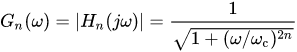

where:

- G is the gain of an n-order Butterworth low-pass filter
- H is transfer funcion
- j is imaginary number
- n is the number of poles in the filter—equal to the number of reactive elements in a passive filter
- ω  is the angular frequency in radians per second,
- ${\displaystyle \omega _{\mathrm {c} }}{\displaystyle \omega _{\mathrm {c} }}$ is the cutoff frequency.